#Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
sns.set()

#Loading the Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [11]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


#Checking DataFrame Dimensions

In [12]:
df.shape

(200, 4)

#DataFrame Overview, Statistical Summary, and Missing Value Analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [14]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [15]:
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#Removing Columns from DataFrame for Data Cleaning

In [18]:
#df.drop('CustomerID', axis=1, inplace=True)
#df.columns

In [19]:
df.head(3)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


In [20]:
df.tail(3)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
197,Male,32,126,74
198,Male,32,137,18
199,Male,30,137,83


#Exploratory Data Analysis (EDA)

In [22]:
df['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

Text(0, 0.5, 'Count')

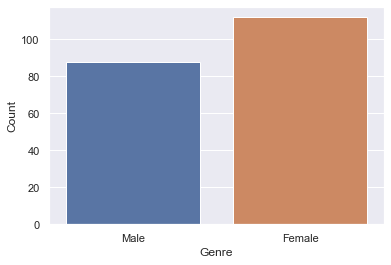

In [24]:
sns.countplot(x='Genre', data=df)
plt.xlabel('Genre')
plt.ylabel('Count')

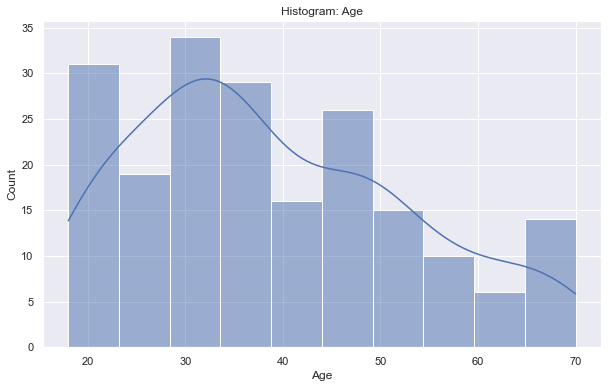

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=10, kde=True)
plt.title('Histogram: Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

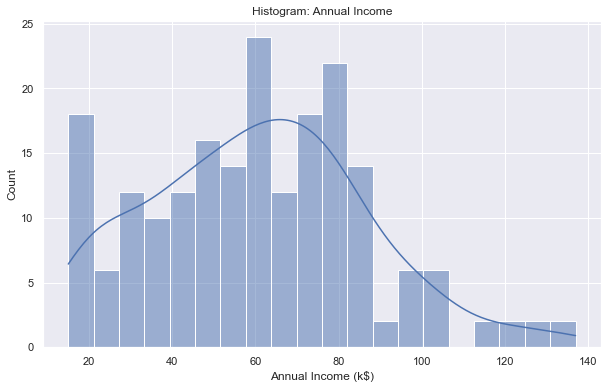

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Annual Income (k$)', bins=20, kde=True)
plt.title('Histogram: Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()

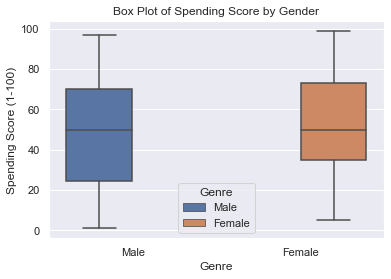

In [28]:
sns.boxplot(data=df, x='Genre', y='Spending Score (1-100)', hue='Genre')
plt.title('Box Plot of Spending Score by Gender')
plt.xlabel('Genre')
plt.ylabel('Spending Score (1-100)')
plt.show()

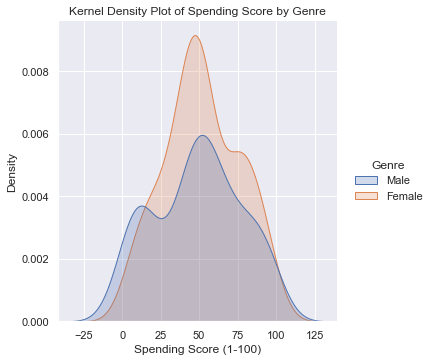

In [30]:
sns.displot(data=df, x='Spending Score (1-100)', hue='Genre', kind='kde', fill=True)
plt.title('Kernel Density Plot of Spending Score by Genre')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Density')
plt.show()

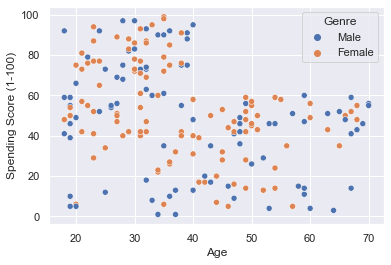

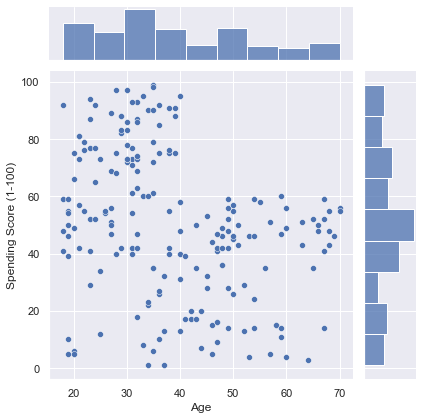

In [32]:
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Genre')
sns.jointplot(data=df, x='Age', y='Spending Score (1-100)')

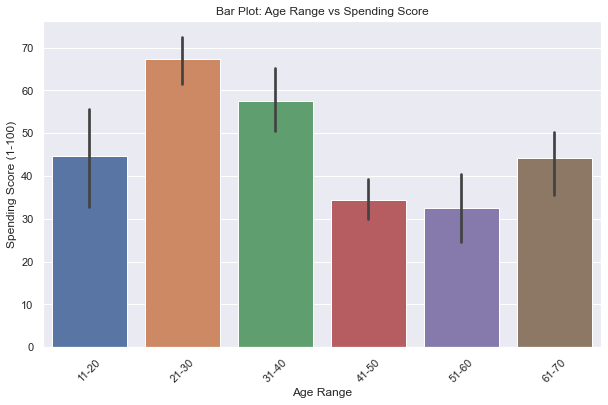

In [34]:
age_ranges = pd.cut(df['Age'], bins=[10, 20, 30, 40, 50, 60, 70], labels=['11-20', '21-30', '31-40', '41-50', '51-60', '61-70'])

df['Age Range'] = age_ranges

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Age Range', y='Spending Score (1-100)')
plt.title('Bar Plot: Age Range vs Spending Score')
plt.xticks(rotation=45)
plt.show()

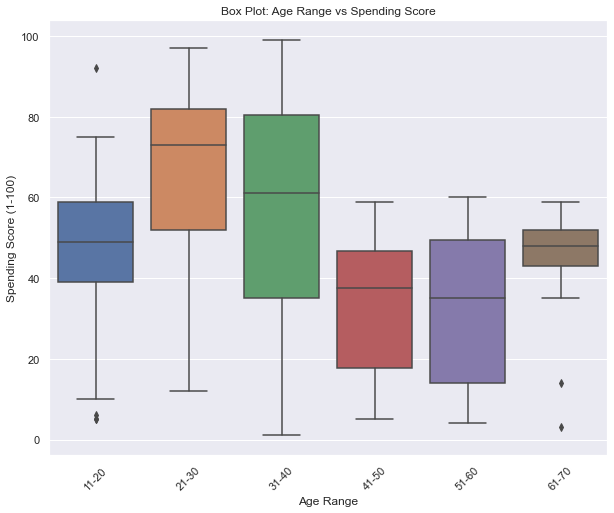

In [35]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Age Range', y='Spending Score (1-100)')
plt.title('Box Plot: Age Range vs Spending Score')
plt.xticks(rotation=45)
plt.show()

<Figure size 720x576 with 0 Axes>

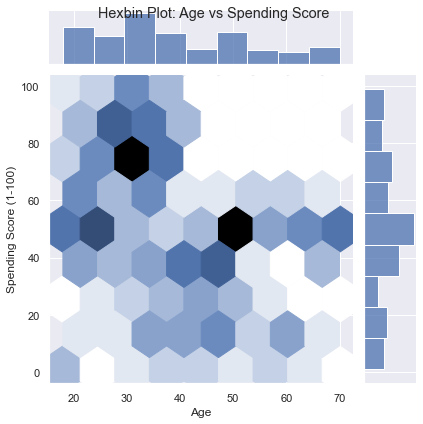

In [36]:
plt.figure(figsize=(10, 8))
sns.jointplot(data=df, x='Age', y='Spending Score (1-100)', kind='hex')
plt.suptitle('Hexbin Plot: Age vs Spending Score')
plt.show()

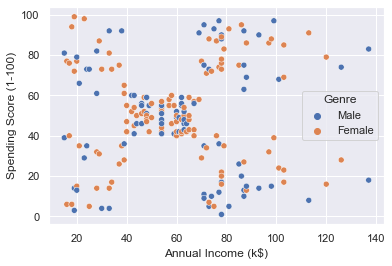

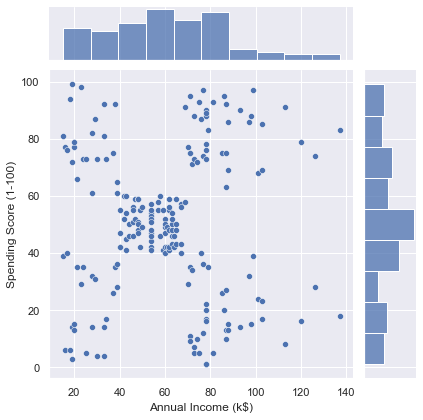

In [38]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre')
sns.jointplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

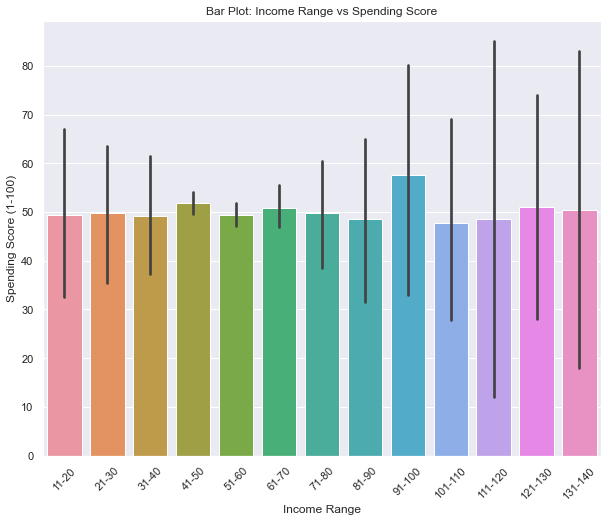

In [40]:
income_ranges = pd.cut(df['Annual Income (k$)'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140], labels=['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-110', '111-120', '121-130', '131-140'])

df['Income Range'] = income_ranges

plt.figure(figsize=(10, 8))
sns.barplot(data=df, x='Income Range', y='Spending Score (1-100)')
plt.title('Bar Plot: Income Range vs Spending Score')
plt.xticks(rotation=45)
plt.show()

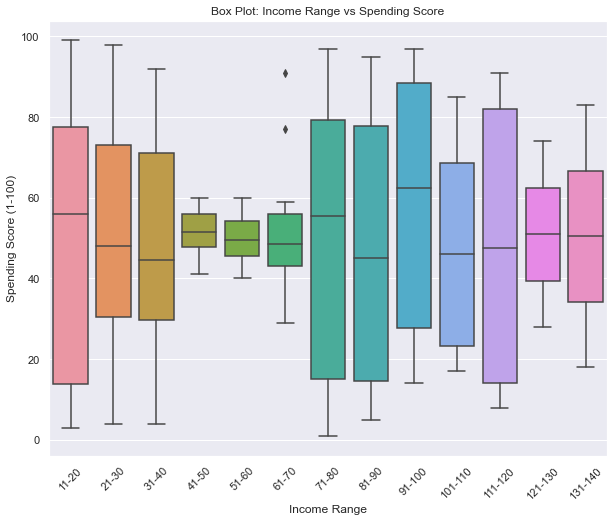

In [41]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Income Range', y='Spending Score (1-100)')
plt.title('Box Plot: Income Range vs Spending Score')
plt.xticks(rotation=45)
plt.show()

<Figure size 720x576 with 0 Axes>

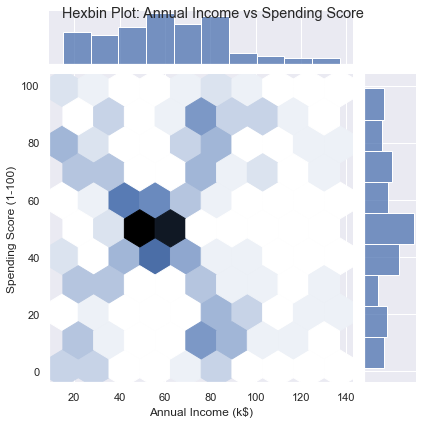

In [42]:
plt.figure(figsize=(10, 8))
sns.jointplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', kind='hex')
plt.suptitle('Hexbin Plot: Annual Income vs Spending Score')
plt.show()

#Feature Scaling

In [43]:
X = df.iloc[:, [2,3]]
X.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [44]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Elbow Method for Optimal Number of Clusters using K-Means Clustering

In [45]:
wcss = []
for i in range(1, 11):
    kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans_model.fit(X)
    wcss.append(kmeans_model.inertia_)

C:\Users\nehac\.conda\envs\deepl\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


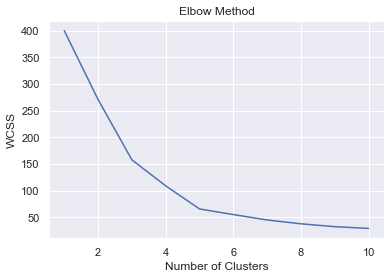

In [46]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimal number of clusters is 5.

#Clustering Models

##Visualization of K-Means Clusters for Customer Segmentation

In [47]:
kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans_model.fit_predict(X)

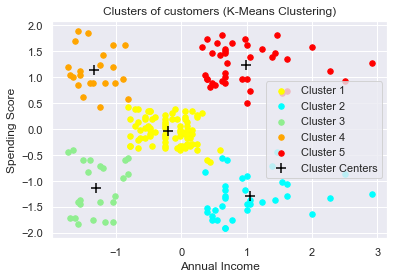

In [48]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'cyan', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'lightgreen', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'red', label = 'Cluster 5')
plt.scatter(x=kmeans_model.cluster_centers_[:, 0], y=kmeans_model.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of customers (K-Means Clustering)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

##Visualization of Hierarchical Clusters for Customer Segmentation

In [49]:
hierarchical_model = AgglomerativeClustering(n_clusters=5)
y_hierarchical = hierarchical_model.fit_predict(X)

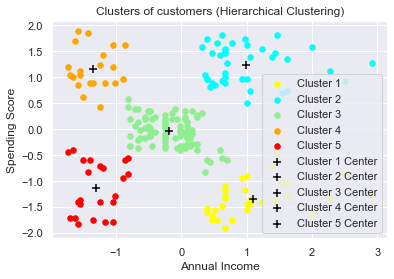

In [50]:
plt.scatter(X[y_hierarchical == 0, 0], X[y_hierarchical == 0, 1], s=30, c='yellow', label='Cluster 1')
plt.scatter(X[y_hierarchical == 1, 0], X[y_hierarchical == 1, 1], s=30, c='cyan', label='Cluster 2')
plt.scatter(X[y_hierarchical == 2, 0], X[y_hierarchical == 2, 1], s=30, c='lightgreen', label='Cluster 3')
plt.scatter(X[y_hierarchical == 3, 0], X[y_hierarchical == 3, 1], s=30, c='orange', label='Cluster 4')
plt.scatter(X[y_hierarchical == 4, 0], X[y_hierarchical == 4, 1], s=30, c='red', label='Cluster 5')

for cluster_label in range(5):
    cluster_points = X[y_hierarchical == cluster_label]
    cluster_center = np.mean(cluster_points, axis=0)
    plt.scatter(cluster_center[0], cluster_center[1], s=70, marker='+', c='black', label=f'Cluster {cluster_label + 1} Center')

plt.legend()
plt.title('Clusters of customers (Hierarchical Clustering)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

##Visualization of Gaussian Mixture Model Clusters for Customer Segmentation

In [51]:
gmm_model = GaussianMixture(n_components=5, random_state=42)
gmm_model.fit(X)
y_gmm = gmm_model.predict(X)

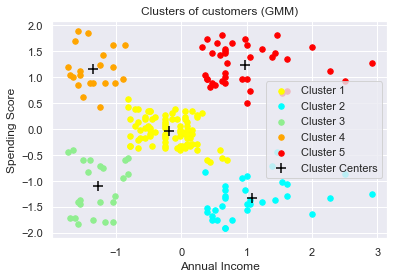

In [52]:
plt.scatter(X[y_gmm == 0, 0], X[y_gmm == 0, 1], s=30, c='yellow', label='Cluster 1')
plt.scatter(X[y_gmm == 1, 0], X[y_gmm == 1, 1], s=30, c='cyan', label='Cluster 2')
plt.scatter(X[y_gmm == 2, 0], X[y_gmm == 2, 1], s=30, c='lightgreen', label='Cluster 3')
plt.scatter(X[y_gmm == 3, 0], X[y_gmm == 3, 1], s=30, c='orange', label='Cluster 4')
plt.scatter(X[y_gmm == 4, 0], X[y_gmm == 4, 1], s=30, c='red', label='Cluster 5')
plt.scatter(x=gmm_model.means_[:, 0], y=gmm_model.means_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of customers (GMM)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

##Visualization of Spectral Clusters for Customer Segmentation

In [53]:
spectral_model = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)
y_spectral = spectral_model.fit_predict(X)

C:\Users\nehac\.conda\envs\deepl\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


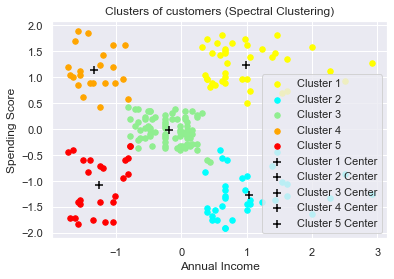

In [54]:
plt.scatter(X[y_spectral == 0, 0], X[y_spectral == 0, 1], s=30, c='yellow', label='Cluster 1')
plt.scatter(X[y_spectral == 1, 0], X[y_spectral == 1, 1], s=30, c='cyan', label='Cluster 2')
plt.scatter(X[y_spectral == 2, 0], X[y_spectral == 2, 1], s=30, c='lightgreen', label='Cluster 3')
plt.scatter(X[y_spectral == 3, 0], X[y_spectral == 3, 1], s=30, c='orange', label='Cluster 4')
plt.scatter(X[y_spectral == 4, 0], X[y_spectral == 4, 1], s=30, c='red', label='Cluster 5')

cluster_centers = []
for i in range(5):
    cluster_center = np.mean(X[y_spectral == i], axis=0)
    cluster_centers.append(cluster_center)
    plt.scatter(cluster_center[0], cluster_center[1], s=70, marker='+', c='black', label=f'Cluster {i + 1} Center')

plt.legend()
plt.title('Clusters of customers (Spectral Clustering)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()